# **train a simple linear regression model using Numpy**

- supervised learning
- regression

In [19]:
import numpy as np

# load and visualize data in this project
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
lr = 0.0001
epochs = 10000
epoch_verbose = 100

## **Dataset**

In [21]:
df = pd.read_csv("house_price_dataset_1000.csv")
df

,Area,Rooms,BuildingAge,DistanceToCenter,Price
0,134,4,39,2.6,1095
1,115,3,10,6.9,616
2,139,4,2,13.1,1360
3,165,5,5,5.2,1574
4,112,3,8,4.2,1255
...,...,...,...,...,...
995,111,3,5,12.6,828
996,173,5,38,4.8,1070
997,139,4,22,12.2,884
998,102,3,24,14.6,137


In [22]:
x_len = len(df.columns) - 1
dataset_array = df.to_numpy()
x = dataset_array[:, :x_len] # features
y = dataset_array[:, -1] # lables

### Data Preprocessing (Standardization)

In [23]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=0)
    return (X - mean) / (std + 1e-8)

In [24]:
X = standardize(x)
X

array([[ 0.47468766,  0.47092644,  1.71932964, -1.43781022],
       [-0.17369951, -0.52049764, -0.81475044, -0.31982249],
       [ 0.64531586,  0.47092644, -1.51380701,  1.29215982],
       ...,
       [ 0.64531586,  0.47092644,  0.23383442,  1.05816239],
       [-0.61733284, -0.52049764,  0.40859857,  1.68215554],
       [ 0.57706458,  0.47092644, -0.11569386, -0.70981821]])

## **First Forwardpropagation**



In [25]:
w = np.random.randn(x_len) # number of features = number of weights
b = 0

In [26]:
y_pred = X.dot(w) + b

In [27]:
y_table = {
  "y_true": y,
  "y_pred": y_pred
}

#load data into a DataFrame object:
ydf = pd.DataFrame(y_table)

print(ydf)

     y_true    y_pred
0    1095.0  0.693929
1     616.0 -1.275898
2    1360.0  0.035705
3    1574.0 -0.533400
4    1255.0 -1.926269
..      ...       ...
995   828.0 -0.552666
996  1070.0  1.737795
997   884.0  1.291596
998   137.0  1.186459
999  1327.0 -0.276593

[1000 rows x 2 columns]


## **First Backpropagation**


### Loss Function (MSE)

In [28]:
# MSE = sigma(y_true - y_pred)**2 / N
loss = np.mean((y - y_pred) ** 2)
loss

np.float64(997936.0647208889)

### Optimizer (Gradient Descent)

In [29]:
# gradient = dloss/dw
dw = 2 * X.T.dot(y_pred - y) / len(y)
db = 2 * np.mean(y_pred - y)

# w_new = w_old - lr * gradient
new_w = w - lr * dw
new_b = b - lr * db

In [30]:
w_table = {
    "w_old": w,
    "w_new": new_w,
}

wdf = pd.DataFrame(w_table)
print(wdf)
print()
print("b:", b, "new_b:", new_b)

      w_old     w_new
0 -0.021899  0.054054
1  0.735036  0.809557
2  0.815899  0.770493
3  0.726537  0.700114

b: 0 new_b: 0.1725282


## **Training Cycle**

In [31]:
losses = []
for epoch in range(epochs):
    y_pred = X.dot(w) + b # predition
    loss = np.mean((y - y_pred) ** 2) # validation
    losses.append(loss) # for loss plot

    # optimization
    w -= lr * (-2 * X.T.dot(y - y_pred) / len(y))
    b -= lr * (-2 * np.mean(y - y_pred))

    # monitoring
    if epoch % epoch_verbose == 0:
        print(f"epoch {epoch}, loss: {loss}")

epoch 0, loss: 997936.0647208889
epoch 100, loss: 955155.3120213286
epoch 200, loss: 914443.256998682
epoch 300, loss: 875689.3519302554
epoch 400, loss: 838789.6005559295
epoch 500, loss: 803646.1341180931
epoch 600, loss: 770166.8166213145
epoch 700, loss: 738264.8772162137
epoch 800, loss: 707858.5677657933
epoch 900, loss: 678870.8437948491
epoch 1000, loss: 651229.0671548679
epoch 1100, loss: 624864.7288588224
epoch 1200, loss: 599713.1906532218
epoch 1300, loss: 575713.4439993465
epoch 1400, loss: 552807.8852324159
epoch 1500, loss: 530942.1057570941
epoch 1600, loss: 510064.69622074603
epoch 1700, loss: 490127.0636827366
epoch 1800, loss: 471083.26086925674
epoch 1900, loss: 452889.82666909695
epoch 2000, loss: 435505.63708685985
epoch 2100, loss: 418891.76592666685
epoch 2200, loss: 403011.35453182453
epoch 2300, loss: 387829.48995444167
epoch 2400, loss: 373313.09097398794
epoch 2500, loss: 359430.8014254278
epoch 2600, loss: 346152.8903361953
epoch 2700, loss: 333451.15840704

## **Reports**

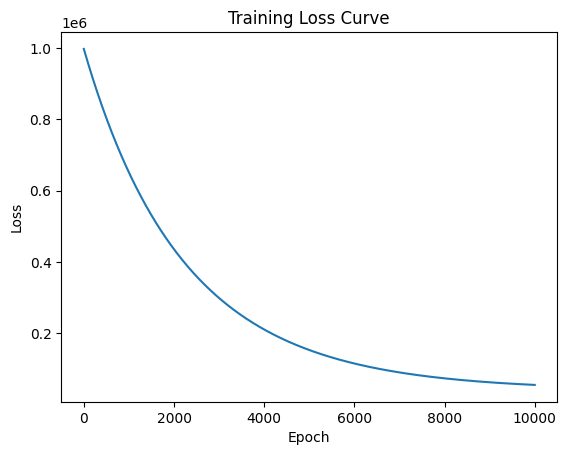

In [32]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.savefig('results/loss_plot.png')
plt.show()